In [ ]:
!pip install pandas matplotlib seaborn altair pingouin

In [24]:
import pathlib as plib

import pandas as pd

import scipy.stats as st
import pingouin as pg # for post-host pairwise test
from statsmodels.stats.anova import AnovaRM # for anova test

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import altair as alt

In [2]:
cwd = plib.Path.cwd()

if cwd.name == 'favorite_letters':
    print("Path is project root")
else:
    print('Current Working Directory is:', cwd)
    print("Recomend navigating to the project root in terminal and opening your chosen idea via the command 'code .'")
    raise NameError('Please correct current working directory to the project root')

data_path = plib.PurePath('letter_popularity_poll-Responses-sorted_data.csv')

Path is project root


In [3]:
data = pd.read_csv(data_path)
data.tail(3)

,letter,codepoint,block,name,0,1,2,3,4,5,6,average,standard dev.,ratings,tier
1173,Ṹ,7800,Latin Extended Additional,Ṹ (LATIN CAPITAL LETTER U WITH TILDE AND ACUTE),19,22,12,9,2,2,1,1.44776,1.39570,67,D
1174,ấ,7845,Latin Extended Additional,ấ (LATIN SMALL LETTER A WITH CIRCUMFLEX AND AC...,22,22,12,8,1,1,3,1.40580,1.50801,69,D
1175,Ễ,7876,Latin Extended Additional,Ễ (LATIN CAPITAL LETTER E WITH CIRCUMFLEX AND ...,24,22,15,6,3,1,2,1.35616,1.42760,73,D


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   letter         1176 non-null   object 
 1   codepoint      1176 non-null   int64  
 2   block          1176 non-null   object 
 3   name           1176 non-null   object 
 4   0              1176 non-null   int64  
 5   1              1176 non-null   int64  
 6   2              1176 non-null   int64  
 7   3              1176 non-null   int64  
 8   4              1176 non-null   int64  
 9   5              1176 non-null   int64  
 10  6              1176 non-null   int64  
 11  average        1176 non-null   float64
 12  standard dev.  1176 non-null   float64
 13  ratings        1176 non-null   int64  
 14  tier           1176 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 137.9+ KB


# TODO: describe describe

In [5]:
describe_df = data.describe()
describe_df

,codepoint,0,1,2,3,4,5,6,average,standard dev.,ratings
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,15330.961735,7.880952,12.798469,13.196429,14.121599,11.479592,7.392007,7.800170,2.778416,1.658098,74.669218
std,25235.732055,4.697608,5.967232,4.712466,4.904155,5.966824,5.512098,6.682084,0.711294,0.173744,9.312829
min,65.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.356160,1.220240,42.000000
25%,440.750000,4.000000,8.000000,10.000000,11.000000,7.000000,3.000000,3.000000,2.219498,1.533622,69.750000
50%,7552.500000,7.000000,13.000000,13.000000,13.000000,11.000000,6.000000,6.000000,2.684210,1.647065,75.000000
75%,11371.250000,10.250000,17.000000,16.000000,17.000000,16.000000,11.000000,10.000000,3.329030,1.765290,80.000000
max,122666.000000,29.000000,29.000000,27.000000,37.000000,30.000000,28.000000,53.000000,4.724140,2.364680,107.000000


In [6]:
plot_describe_df = describe_df.transpose().loc['0':'6'].reset_index()
plot_describe_df = plot_describe_df.rename(columns={'index':'rating'})
plot_describe_df['lower_bound']  = plot_describe_df['mean'] - plot_describe_df['std']
plot_describe_df['upper_bound']  = plot_describe_df['mean'] + plot_describe_df['std']
plot_describe_df

,rating,count,mean,std,min,25%,50%,75%,max,lower_bound,upper_bound
0,0,1176.0,7.880952,4.697608,0.0,4.0,7.0,10.25,29.0,3.183345,12.578560
1,1,1176.0,12.798469,5.967232,0.0,8.0,13.0,17.00,29.0,6.831237,18.765702
2,2,1176.0,13.196429,4.712466,1.0,10.0,13.0,16.00,27.0,8.483962,17.908895
3,3,1176.0,14.121599,4.904155,3.0,11.0,13.0,17.00,37.0,9.217444,19.025753
4,4,1176.0,11.479592,5.966824,0.0,7.0,11.0,16.00,30.0,5.512768,17.446416
5,5,1176.0,7.392007,5.512098,0.0,3.0,6.0,11.00,28.0,1.879909,12.904105
6,6,1176.0,7.800170,6.682084,1.0,3.0,6.0,10.00,53.0,1.118086,14.482254


In [9]:
points = alt.Chart(plot_describe_df).mark_point(filled=True).encode(
    alt.X('mean').title('Average count of ratings'),
    alt.Y('rating').title('Rating')
)

stdev = alt.Chart(plot_describe_df).mark_line().encode(
    alt.X('lower_bound'),
    alt.X2('upper_bound'),
    y = 'rating'
)
(stdev + points).properties(
    title = "Vote-Rating Frequency Table"
)

alt.LayerChart(...)

# Statistical difference in average ratings

In [61]:
tier_full = ['S+', 'S', 'S-', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
data['tier'].unique()

array(['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
      dtype=object)

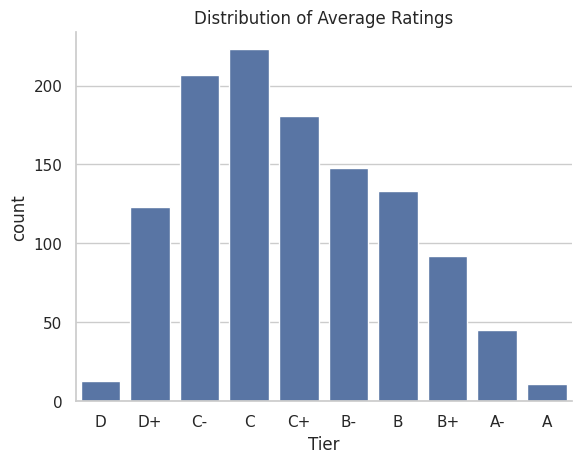

In [57]:
used_columns = ['0', '1', '2', '3', '4', '5', '6']
df = data.loc[:, used_columns]
fig, ax = plt.subplots()
sns.countplot(data=data, x='tier')

ax.xaxis.set_inverted(True)
ax.set_xlabel("Tier")
ax.set_title("Distribution of Average Ratings")
ax.grid(False, axis='x')
sns.despine()
fig.savefig("images/tier_dist_freq_plot")

16 potential tiers, only 10 applicable to data


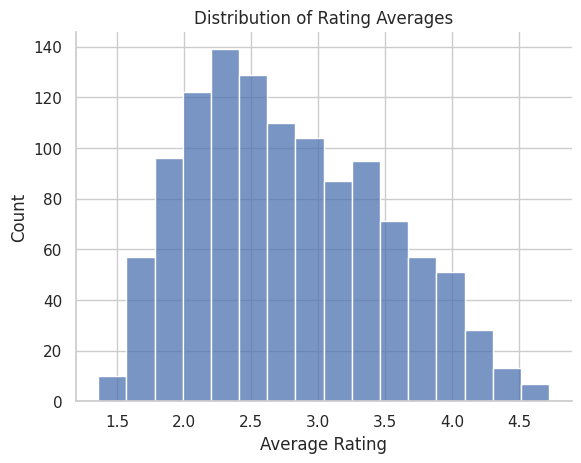

In [70]:
print(f'{len(tier_full)} potential tiers, only 10 applicable to data')
used_columns = ['0', '1', '2', '3', '4', '5', '6']
df = data.loc[:, used_columns]
fig, ax = plt.subplots()
sns.histplot(data=data, x='average', bins=16)

ax.set_xlabel("Average Rating")
ax.set_title("Distribution of Rating Averages")
# ax.grid(False, axis='x')
sns.despine()
fig.savefig("images/rating_dist_histogram")

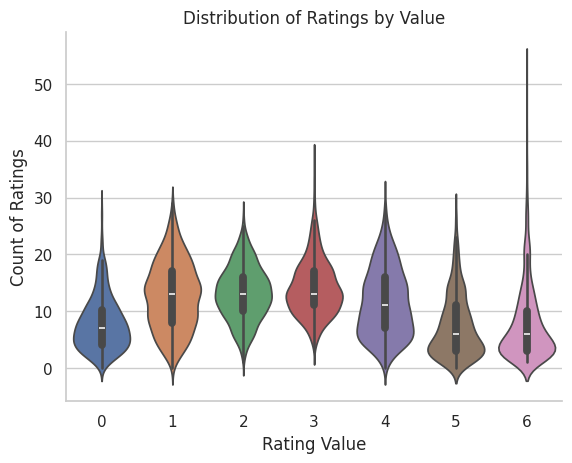

In [30]:
# Pull out a specific subset of columns
used_columns = ['0', '1', '2', '3', '4', '5', '6']
df = data.loc[:, used_columns]

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df)

# Finalize the figure
ax.set_xlabel("Rating Value")
ax.set_ylabel("Count of Ratings")
ax.set_title("Distribution of Ratings by Value")
sns.despine()
fig.savefig("images/Ratings_distributions_violin")

In [11]:
data[data['6'] > 35]

,letter,codepoint,block,name,0,1,2,3,4,5,6,average,standard dev.,ratings,tier
1,ɤ,612,IPA Extensions,ɤ (LATIN SMALL LETTER RAMS HORN),3,4,4,5,19,26,41,4.69608,1.55932,102,A
2,ᴥ,7461,Phonetic Extensions,ᴥ (LATIN LETTER AIN),4,8,3,5,14,13,53,4.68000,1.83060,100,A
3,ö,246,Latin-1 Supplement,ö (LATIN SMALL LETTER O WITH DIAERESIS),2,4,3,7,18,11,37,4.63415,1.62171,82,A
4,Þ,222,Latin-1 Supplement,Þ (LATIN CAPITAL LETTER THORN),2,4,4,14,15,27,36,4.55882,1.53232,102,A
11,Æ,198,Latin-1 Supplement,Æ (LATIN CAPITAL LETTER AE),6,6,5,7,21,17,41,4.38835,1.83235,103,A-


## Distribution of number of ratings is right skewed

Average is
Median is 